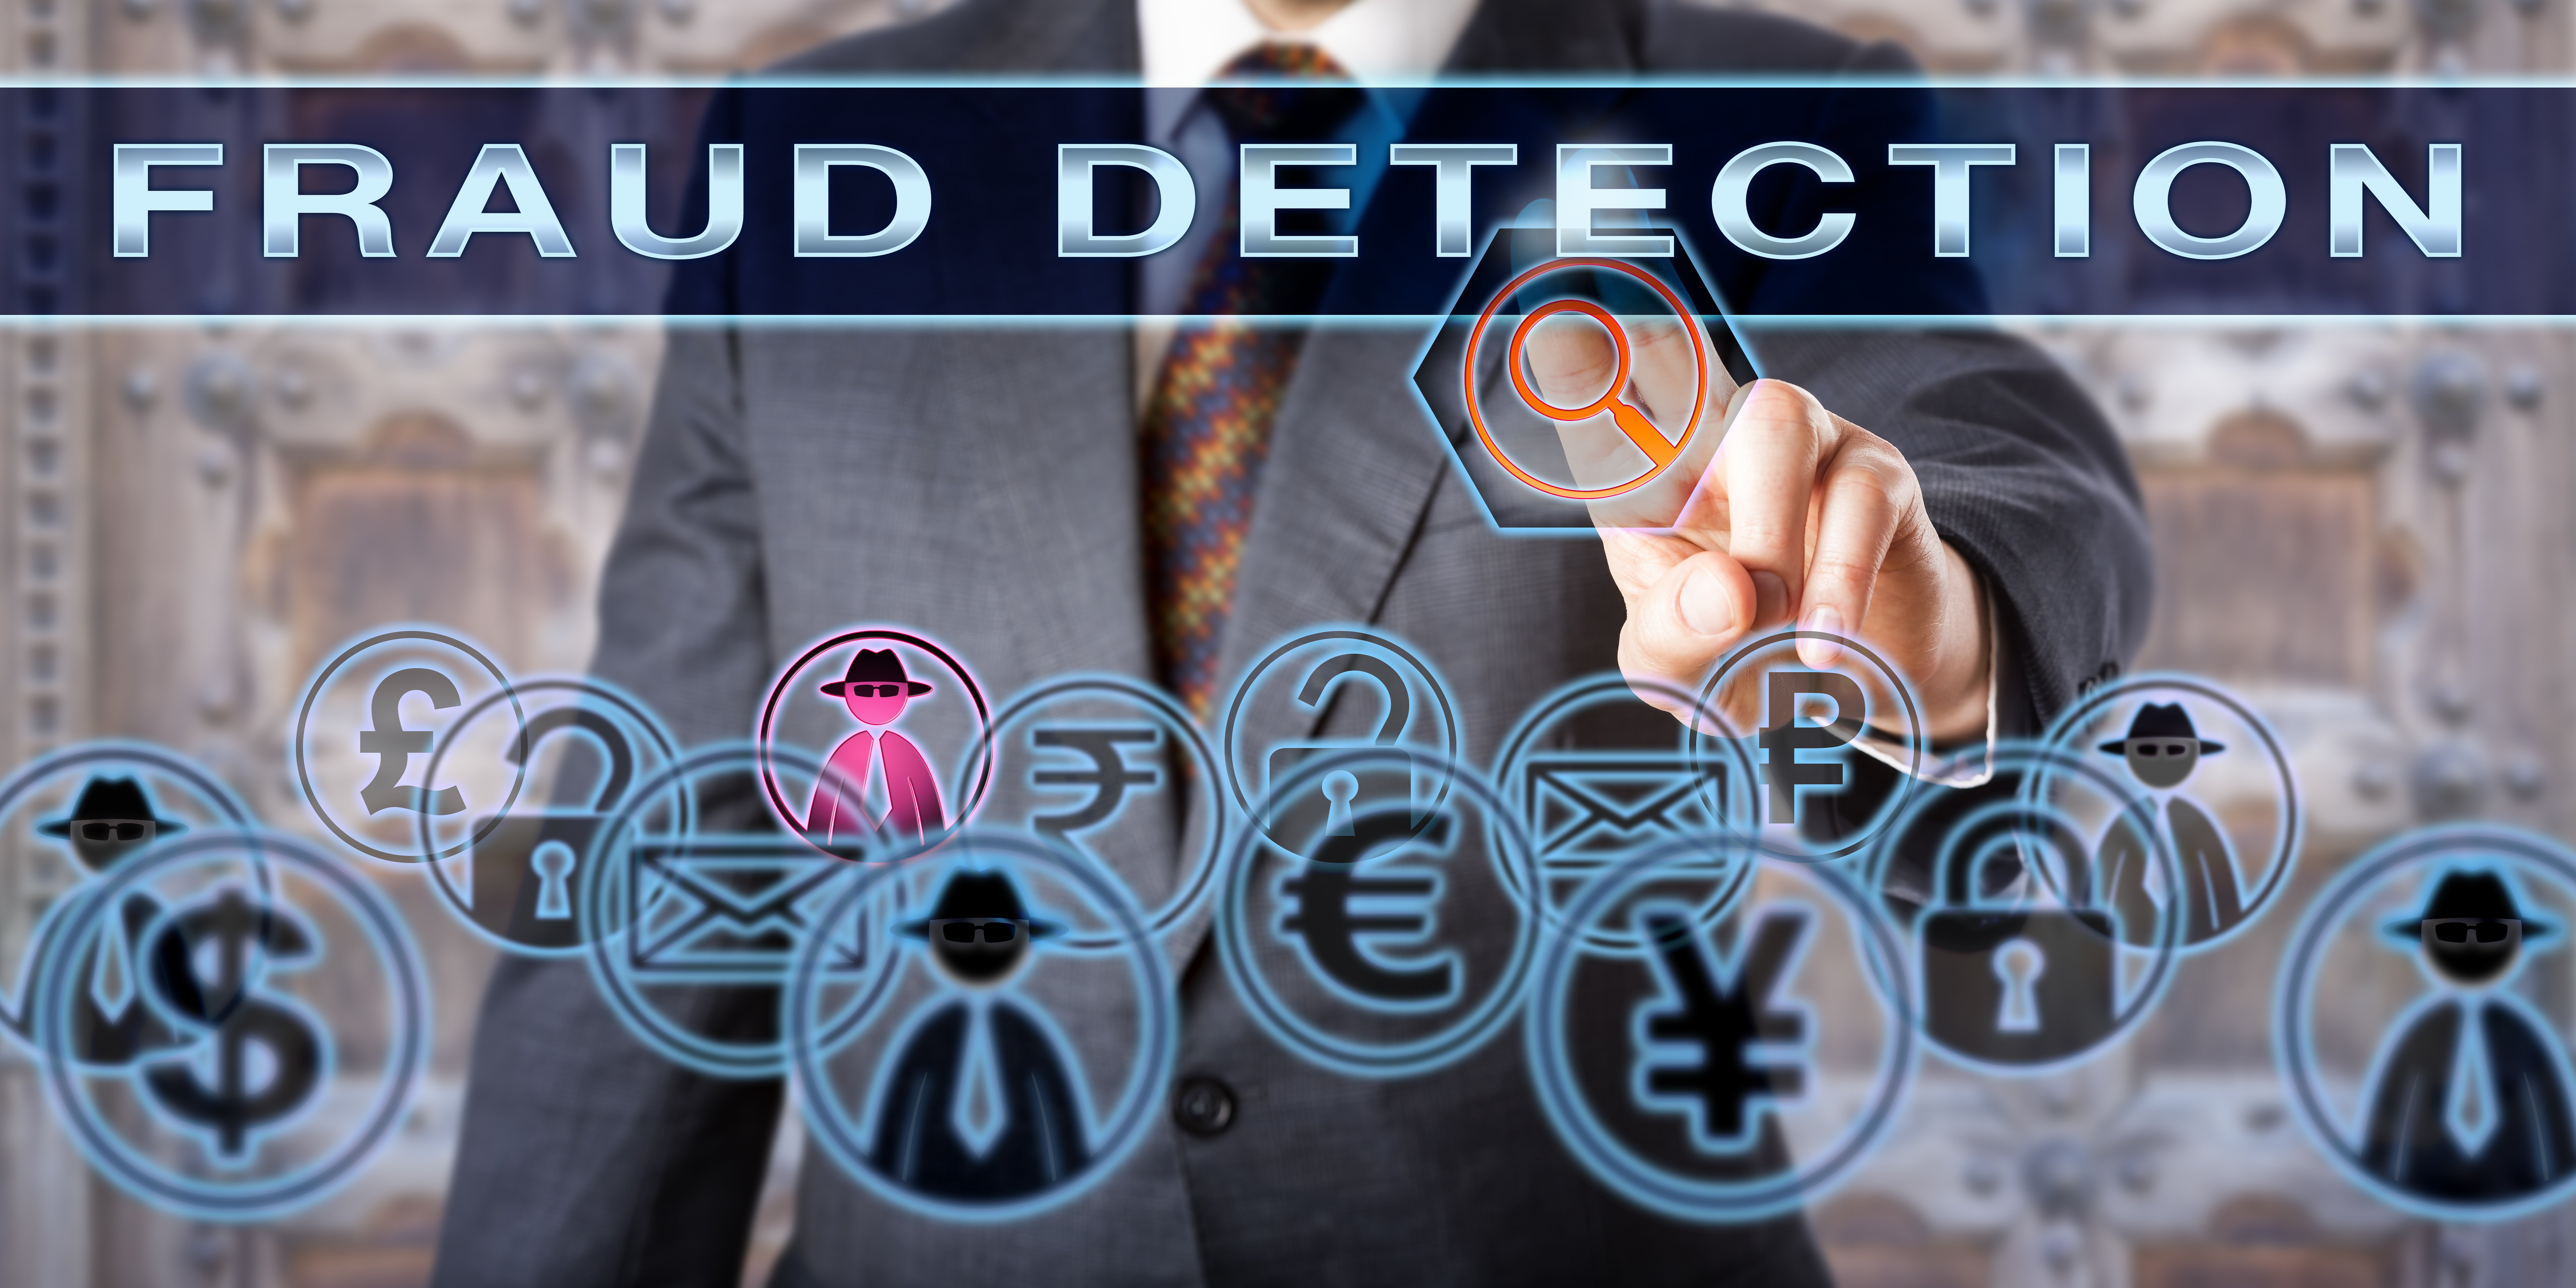

### Import Required Library

In [48]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### Load & Understand the Data

Dataset Link:
https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection

In [4]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\ML Datasets\\online_payment.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
print("Shape :", df.shape)

Shape : (6362620, 11)


In [7]:
print("Columns :\n", df.columns)

Columns :
 Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [9]:
print("Data types :\n", df.dtypes)

Data types :
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


### Missing Value

In [10]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**No missing values.**

### Descriptive Statistics

In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Plot the correlation with "isFraud"

In [15]:
correlation = df.corr()
corr=correlation["isFraud"].sort_values(ascending=False)
corr

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

**Correlation is not effective, low correlation values.**

### Change Categorical object column to numerical with suitable integer

In [18]:
df['type'].unique()

array([2, 4, 1, 5, 3], dtype=int64)

In [17]:
df["type"].replace({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5}, inplace=True)
df['type'].unique()

step                int64
type                int64
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### Unique values is type column

In [21]:
df['type'].value_counts()

1    2237500
2    2151495
3    1399284
4     532909
5      41432
Name: type, dtype: int64

### Top 10 biggest Transaction amounts

In [24]:
df.groupby('nameOrig')['amount'].max().sort_values(ascending=False)[:10]

nameOrig
C1715283297    92445516.64
C2127282686    73823490.36
C2044643633    71172480.42
C1425667947    69886731.30
C1584456031    69337316.27
C811810230     67500761.29
C420748282     66761272.21
C1139847449    64234448.19
C300140823     63847992.58
C372535854     63294839.63
Name: amount, dtype: float64

In [25]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

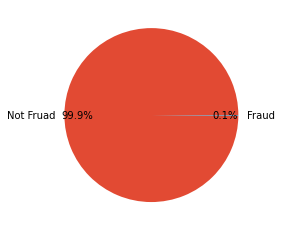

In [36]:
plt.pie(df.isFraud.value_counts(), labels=['Not Fruad','Fraud'],
        autopct='%1.1f%%', pctdistance=0.85);

**Fraud Data is about 0.1%, and if we Train our model then our model will not perform well.**

### Handling Under-Sampling Problem

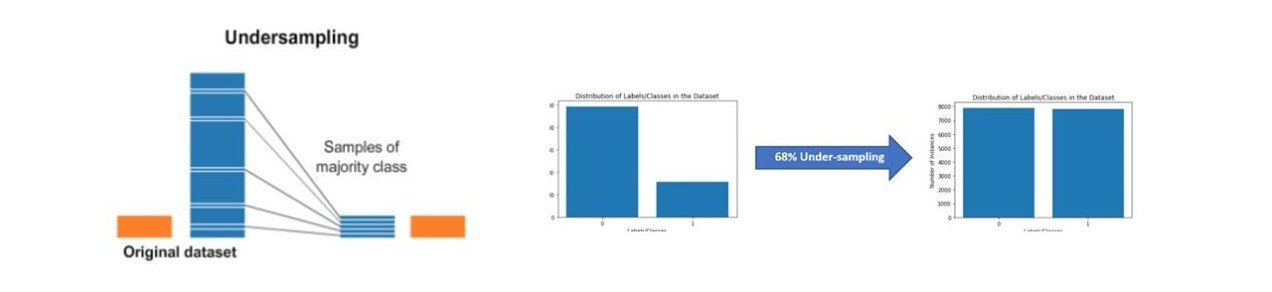

In [37]:
cc_0, cc_1 = df['isFraud'].value_counts()

class_0 = df[df['isFraud'] == 0]
class_1 = df[df['isFraud'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6354407, 11)
class 1: (8213, 11)


In [38]:
class_0_under = class_0.sample(cc_1)
data = pd.concat([class_0_under, class_1], axis=0)
data.isFraud.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

Now Our Data is balanced.

In [39]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5434667,378,4,407814.54,C623214508,11283.0,0.00,C475553010,116308.58,524123.12,0,0
5028290,353,3,225813.39,C32643912,106108.0,331921.39,C1839002299,10513.00,0.00,0,0
1346994,137,4,467645.37,C1472974822,0.0,0.00,C459216777,900996.58,1368641.95,0,0
1244564,134,4,1104096.98,C1915221165,0.0,0.00,C751720613,7745706.10,8849803.07,0,0
3345949,253,4,67368.42,C1132509622,0.0,0.00,C1650195208,86994.03,154362.45,0,0


### Fraud Detection using Different Machine Learning Classification Models

In [40]:
correlation = data.corr()
corr=correlation["isFraud"].sort_values(ascending=False)
corr

isFraud           1.000000
amount            0.338689
step              0.323611
type              0.165006
oldbalanceOrg     0.114981
isFlaggedFraud    0.031225
newbalanceDest   -0.004197
oldbalanceDest   -0.090972
newbalanceOrig   -0.139660
Name: isFraud, dtype: float64

### Creating dependent & Independent features

In [42]:
X = data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']].values
y = data['isFraud'].values

### Train test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Train shape:", X_train.shape, "Test_shape:", X_test.shape)

Train shape: (12319, 4) Test_shape: (4107, 4)


### Standardize the input features

In [46]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Create a Function which train, fit the model & predict

In [49]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [57]:
for name, model in models.items():
    print(f'Training Model {name} \n')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' ))
    print('*-*'*30)

Training Model LR 

Training Accuracy: 0.877262764834808
Testing Accuracy: 0.8894570245921597
Recall Score :  0.8894570245921597
Precision Score :  0.8894570245921597
Testing F-1: 0.8894570245921597
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training Model KNN 

Training Accuracy: 0.9917201071515546
Testing Accuracy: 0.9897735573411249
Recall Score :  0.9897735573411249
Precision Score :  0.9897735573411249
Testing F-1: 0.9897735573411249
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training Model DT 

Training Accuracy: 1.0
Testing Accuracy: 0.9919649379108838
Recall Score :  0.9919649379108838
Precision Score :  0.9919649379108838
Testing F-1: 0.9919649379108838
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Training Model RF 

Training Accuracy: 0.9999188245799172
Testing Accuracy: 0.9914779644509374
Recall Score :  0.9914779644509374
Precision Sc

### Conclusion:
**1. Decision Tree**

**2. Random Forest**

**3. XGBoost Classifier** are the best models to Predict Fraud Detection.